# Lab 4

Integrantes
- Antonia Labarca
- Felipe Urrutia

## Ejercicio 1

In [51]:
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sns

plt.style.use(['seaborn', "seaborn-dark"][0])
plt.rc('axes', titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams.update({'lines.markeredgewidth': 1})
plt.rcParams.update({'errorbar.capsize': 2})

In [1]:
import numpy as np

C:\Users\felip\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\felip\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\felip\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
Y1 = 1
Y2 = 2
c = 1
T = 10
p01 = 1
p02 = 1

In [3]:
experimento = {
    1: [1,1,0],
    2: [1,2,1],
    3: [10,2,1]
}

In [4]:
A_hat = np.array([
    [0,1,1,0],
    [-1,0,0,0],
    [0,0,0,1],
    [0,0,-1,0]
])
r_hat = np.array([
    -Y2,
    Y1,
    0,
    0
])
X0 = np.array([
    Y1,
    Y2+c,
    p01,
    p02
])
A_hat @ X0

array([ 4, -1,  1, -1])

In [5]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from numpy import linalg as LA

In [6]:
def solve_pontryagin(Y1, Y2, c, T, p0=[1, 1]):
    A_hat = np.array([
        [0,1,1,0],
        [-1,0,0,0],
        [0,0,0,1],
        [0,0,-1,0]
    ])
    r_hat = np.array([
        -Y2,
        Y1,
        0,
        0
    ])
    def obj(p, Y1, Y2, c, T, A_hat, r_hat):
        p01, p02 = p[0], p[1]
        X0 = np.array([Y1, Y2+c, p01, p02])
        sol_X = solve_ivp(lambda t, x: x@A_hat + r_hat, t_span=[0, T], y0=X0)
        p_T = sol_X.y[2:, -1]
        y1_T = sol_X.y[0, -1] 
        ref_p_T = np.array([-y1_T, 0])
        return 0.5*((p_T[0]-ref_p_T[0])**2+(p_T[1]-ref_p_T[1])**2)

    opt_p0 = minimize(
        obj, 
        x0=np.array([p0[0], p0[1]]), 
        args=(Y1, Y2, c, T, A_hat, r_hat)).x
    p01, p02 = opt_p0
    print(p01, p02)
    sol_X = solve_ivp(lambda t, x: x@A_hat + r_hat, 
                      t_span=[0, T], 
                      y0=np.array([Y1, Y2+c, p01, p02]), 
                      dense_output=True)
    return sol_X.sol

In [7]:
from matplotlib import pyplot as plt

In [8]:
def plot_p1(sol, T):
    fig, ax = plt.subplots(1, 2, figsize=(5*2, 5))
    times = np.linspace(0, T, 100)
    X = [sol(t) for t in times] 
    y1 = [x[0] for x in X]
    y2 = [x[1] for x in X]
    p1 = [x[2] for x in X]
    p2 = [x[3] for x in X]
    ax[0].plot(y1, y2)
    ax[0].set_title("Solución")
    ax[0].set_xlabel("y1")
    ax[0].set_ylabel("y2")
    ax[1].plot(p1, p2);
    ax[1].set_title("Adjunto")
    ax[1].set_xlabel("p1")
    ax[1].set_ylabel("p2");
    pass

-101.52910044150626 -101.28947113282962
Wall time: 313 ms


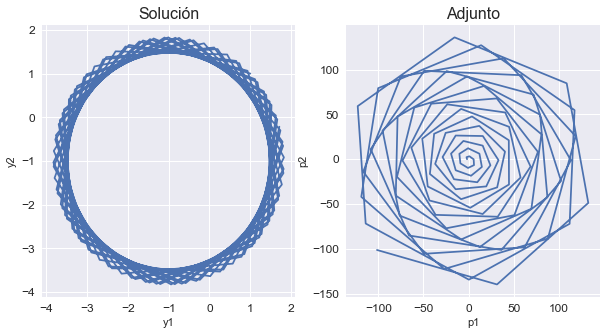

In [52]:
%%time
T=100
exp = 1
sol_p1_1 = solve_pontryagin(Y1=experimento[exp][0], Y2=experimento[exp][1], c=experimento[exp][2], T=T, p0=[1, 1])
plot_p1(sol_p1_1, T)

-102.50112045171028 -252.89345074105836
Wall time: 299 ms


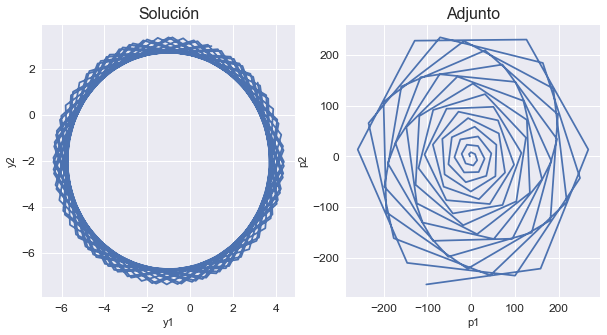

In [53]:
%%time
T=100
exp = 2
sol_p1_2 = solve_pontryagin(Y1=experimento[exp][0], Y2=experimento[exp][1], c=experimento[exp][2], T=T, p0=[1, 1])
plot_p1(sol_p1_2, T)

-1010.5397615040566 -254.91344035291166
Wall time: 559 ms


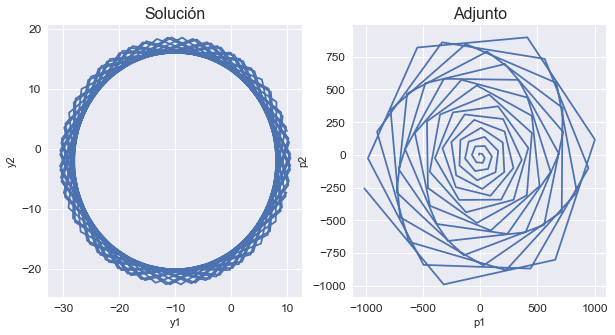

In [54]:
%%time
T=100
exp = 3
sol_p1_3 = solve_pontryagin(Y1=experimento[exp][0], Y2=experimento[exp][1], c=experimento[exp][2], T=T, p0=[1, 1])
plot_p1(sol_p1_3, T)

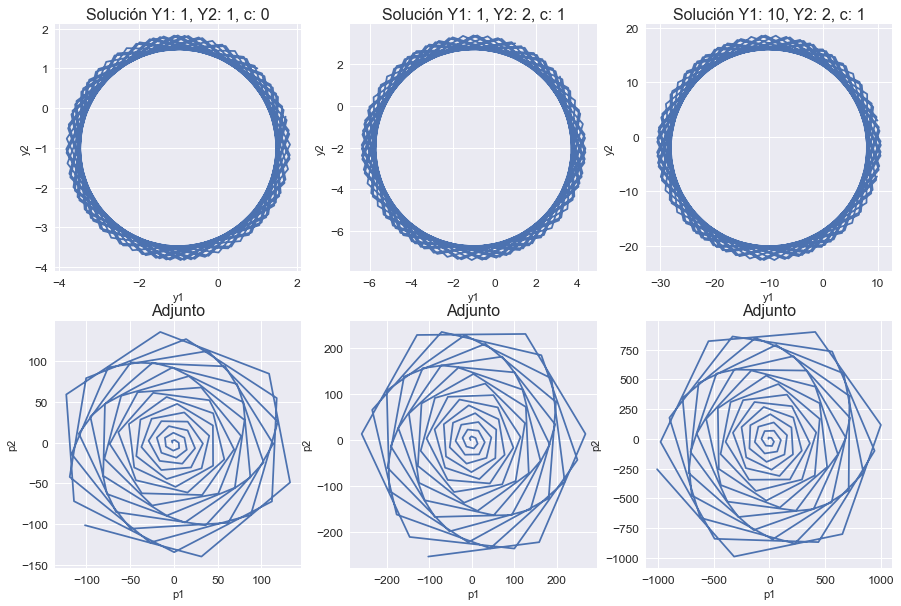

In [56]:
fig, ax = plt.subplots(2, 3, figsize=(3*5, 2*5))
for i in range(3):
    sol_p1 = [sol_p1_1, sol_p1_2, sol_p1_3][i]
    times = np.linspace(0, T, 100)
    X = [sol_p1(t) for t in times] 
    y1 = [x[0] for x in X]
    y2 = [x[1] for x in X]
    p1 = [x[2] for x in X]
    p2 = [x[3] for x in X]
    label = f"Y1: {experimento[i+1][0]}, Y2: {experimento[i+1][1]}, c: {experimento[i+1][2]}"
    ax[0, i].plot(y1, y2)
    ax[0, i].set_title("Solución "+label)
    ax[0, i].set_xlabel("y1")
    ax[0, i].set_ylabel("y2")
    ax[1, i].plot(p1, p2);
    ax[1, i].set_title("Adjunto")
    ax[1, i].set_xlabel("p1")
    ax[1, i].set_ylabel("p2");
plt.savefig("e1_1.pdf", bbox_inches='tight', )

## Ejercicio 2

In [12]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
from control import *

In [13]:
Y1, Y2 = [10, 10]
c=2

Q = np.array([[1, 0],
              [0, 0]])

U = np.array(1)

A = np.array([[ 0, 1],
              [-1, 0]])

B = np.array([[-1],
              [0]])

K, S, E = lqr(A, B, Q, U)
K

array([[-1.00000000e+00, -4.31775426e-16]])

In [111]:
def fun(t, X, A, B, u, r):
    dx = A@X + B*u + r
    return dx[0]

r = np.array([
    -Y2,
    Y1,
    ])
B.T[0]*K

array([[ 1., -0.]])

In [112]:
x0 = np.array([Y1, Y2+c])
sol = scipy.integrate.solve_ivp(fun, [0,10],x0, t_eval=np.linspace(0,10, 1000), args=(A, B.T[0], K, r))
sol;

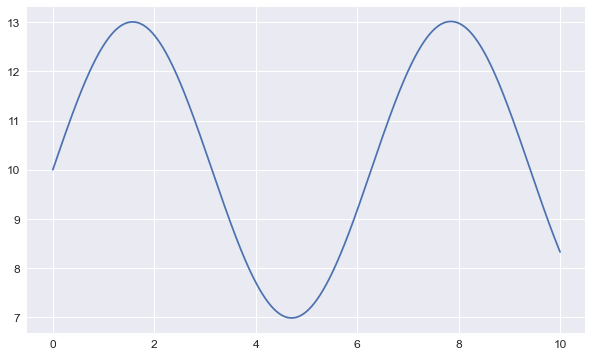

In [113]:
plt.figure()
plt.plot(sol.t, sol.y[0])
plt.show()

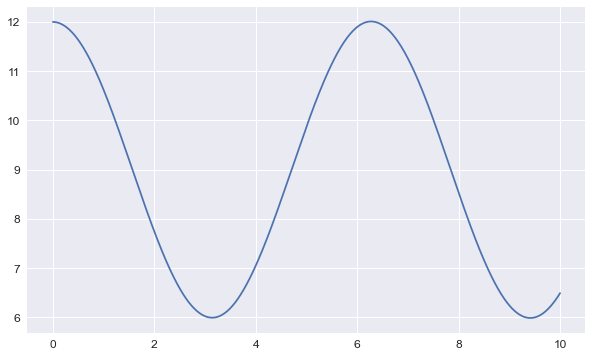

In [114]:
plt.figure()
plt.plot(sol.t, sol.y[1])
plt.show()

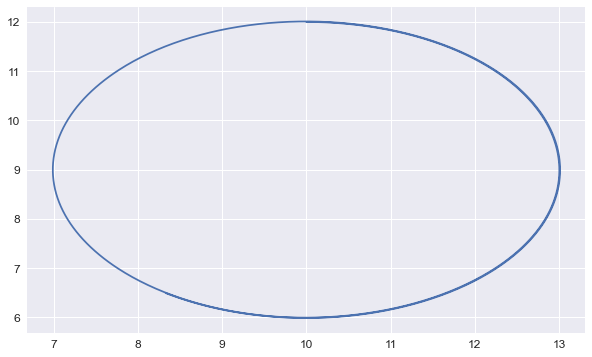

In [115]:
plt.figure()
plt.plot(sol.y[0], sol.y[1])
plt.show()

In [116]:
def plot_p2(sol, T):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    times = np.linspace(0, T, 100)
    X = [sol(t) for t in times] 
    y1 = [x[0] for x in X]
    y2 = [x[1] for x in X]
    ax.plot(y1, y2)
    ax.set_title("Solución")
    ax.set_xlabel("y1")
    ax.set_ylabel("y2")
    pass

In [119]:
def solve_lqr(Y1, Y2, c, T):
    x0 = np.array([Y1, Y2+c])
    r = np.array([
        -Y2,
        Y1,
    ])
    sol = solve_ivp(fun, y0=x0, t_span=[0,T], args=(A, B.T[0], K, r), dense_output=True)
    return sol.sol

Wall time: 31 ms


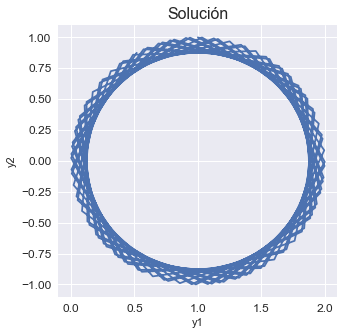

In [120]:
%%time
T=100
exp = 1
sol_p2_1 = solve_lqr(Y1=experimento[exp][0], Y2=experimento[exp][1], c=experimento[exp][2], T=T)
plot_p2(sol_p2_1, T)

Wall time: 30.2 ms


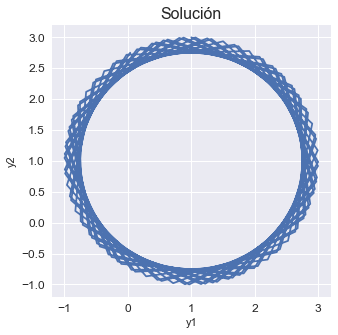

In [121]:
%%time
T=100
exp = 2
sol_p2_2 = solve_lqr(Y1=experimento[exp][0], Y2=experimento[exp][1], c=experimento[exp][2], T=T)
plot_p2(sol_p2_2, T)

Wall time: 30 ms


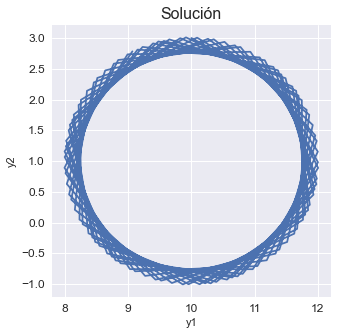

In [122]:
%%time
T=100
exp = 3
sol_p2_3 = solve_lqr(Y1=experimento[exp][0], Y2=experimento[exp][1], c=experimento[exp][2], T=T)
plot_p2(sol_p2_3, T)

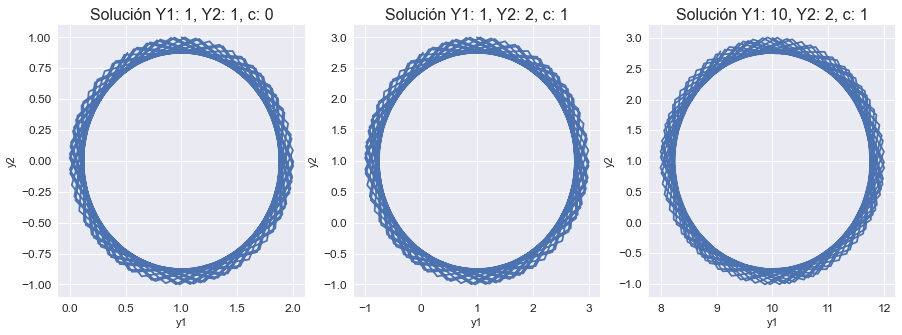

In [126]:
fig, ax = plt.subplots(1, 3, figsize=(3*5, 1*5))
for i in range(3):
    sol_p2 = [sol_p2_1, sol_p2_2, sol_p2_3][i]
    times = np.linspace(0, T, 100)
    X = [sol_p2(t) for t in times] 
    y1 = [x[0] for x in X]
    y2 = [x[1] for x in X]
    label = f"Y1: {experimento[i+1][0]}, Y2: {experimento[i+1][1]}, c: {experimento[i+1][2]}"
    ax[i].plot(y1, y2)
    ax[i].set_title("Solución "+label)
    ax[i].set_xlabel("y1")
    ax[i].set_ylabel("y2")

plt.savefig("e2_1.pdf", bbox_inches='tight', )

Errores con Pontryaguin

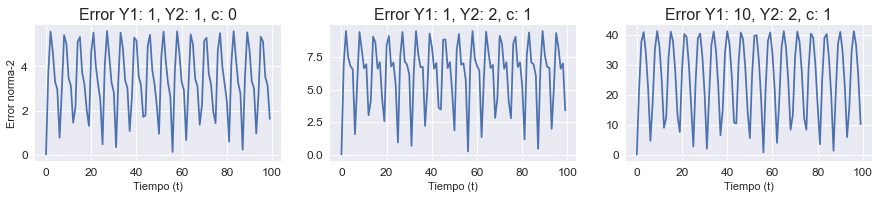

In [125]:
fig, ax = plt.subplots(1, 3, figsize=(3*5, 0.5*5))
for i in range(3):
    sol_p2 = [sol_p2_1, sol_p2_2, sol_p2_3][i]
    sol_p1 = [sol_p1_1, sol_p1_2, sol_p1_3][i]

    times = np.linspace(0, T, 100)

    X = [sol_p2(t) for t in times] 
    p2_y1 = [x[0] for x in X]
    p2_y2 = [x[1] for x in X]

    X = [sol_p1(t) for t in times] 
    p1_y1 = [x[0] for x in X]
    p1_y2 = [x[1] for x in X]

    diff = [np.array([p2_y1[k]-p1_y1[k], p2_y2[k]-p1_y2[k]]) for k in range(len(times))]
    error = [scipy.linalg.norm(d) for d in diff]
    label = f"Y1: {experimento[i+1][0]}, Y2: {experimento[i+1][1]}, c: {experimento[i+1][2]}"
    ax[i].plot(error)
    ax[i].set_title("Error "+label)
    ax[i].set_xlabel("Tiempo (t)")
    if i == 0:
        ax[i].set_ylabel("Error norma-2")
plt.savefig("e2_2.pdf", bbox_inches='tight', )

## Ejercicio 3

$$
\dot{E}(t) = W(t)-A(t)^TE(t) - E(t)^TA(t)-E(t)^TB(t)U(t)^{-1}B(t)^T E(t)
$$
$$
E(T) = -Q
$$
$$
u(t) = U(t)^{-1} B(t)^T E(t)x(t), t \in [0,T]
$$

In [19]:
%%time
A = np.array([
    [0, 1],
    [-1, 0]
])
B = np.array([
    [-1], 
    [0]
])

U = np.array([1])
Q = np.array([
    [1,0],
    [0,0]
])
W = np.zeros((2, 2))

def solve_ricatti(Y1, Y2, c, T):
    def dynamic_E(t, F):
            E = np.array([
                [F[0], F[1]],
                [F[2], F[3]]
            ])
            dE = -(W - A.T@E - E.T@A - E.T@B@B.T@E) # tiempo inverso
            return np.array([dE[0,0],dE[0,1],dE[1,0],dE[1,1]]) 

    opt_E0 = -np.array([Q[0, 0], Q[0, 1], Q[1, 0], Q[1, 1]])
    sol_E = solve_ivp(dynamic_E, t_span=[0,T], y0=opt_E0, max_step=0.1, dense_output=True)
    
    print(sol_E.sol(0))
    
    r = np.array([
    -Y2,
    Y1,
    ])
    
    def dynamic_ric(t, x):
        Et = sol_E.sol(T-t)
        Et = np.array([
            [Et[0], Et[1]],
            [Et[2], Et[3]]
        ])
        dx = A@x + B@(B.T@Et@x)+r
        return dx
    x0 = np.array([
        Y1,
        Y2+c
    ])
    sol_ric = solve_ivp(dynamic_ric, t_span=[0,T], y0=x0, max_step=0.1, dense_output=True)
    print(sol_ric.sol(T))
    return sol_ric.sol

Wall time: 0 ns


In [20]:
def plot_p3(sol, T):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    times = np.linspace(0, T, 100)
    X = [sol(t) for t in times] 
    y1 = [x[0] for x in X]
    y2 = [x[1] for x in X]
    ax.plot(y1, y2)
    ax.set_title("Solución")
    ax.set_xlabel("y1")
    ax.set_ylabel("y2")
    pass

[-1.  0.  0.  0.]
[0.58318638 1.23717687]
Wall time: 501 ms


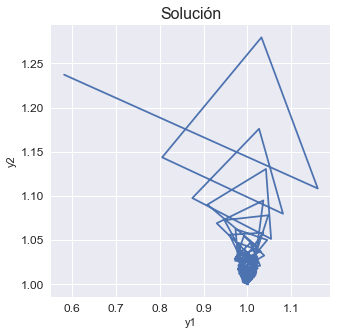

In [57]:
%%time
T=100
exp = 1
sol_p3_1 = solve_ricatti(Y1=experimento[exp][0], Y2=experimento[exp][1], c=experimento[exp][2], T=T)
plot_p3(sol_p3_1, T)

[-1.  0.  0.  0.]
[0.3848702  3.08572282]
Wall time: 554 ms


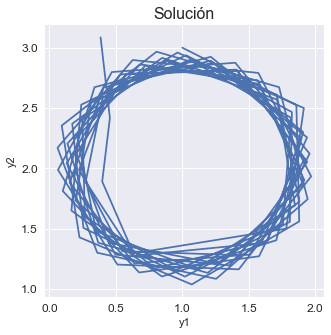

In [58]:
%%time
T=100
exp = 2
sol_p3_2 = solve_ricatti(Y1=experimento[exp][0], Y2=experimento[exp][1], c=experimento[exp][2], T=T)
plot_p3(sol_p3_2, T)

[-1.  0.  0.  0.]
[7.32865015 5.3325486 ]
Wall time: 505 ms


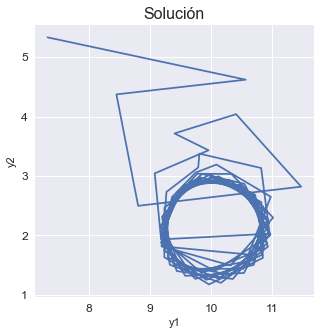

In [59]:
%%time
T=100
exp = 3
sol_p3_3 = solve_ricatti(Y1=experimento[exp][0], Y2=experimento[exp][1], c=experimento[exp][2], T=T)
plot_p3(sol_p3_3, T)

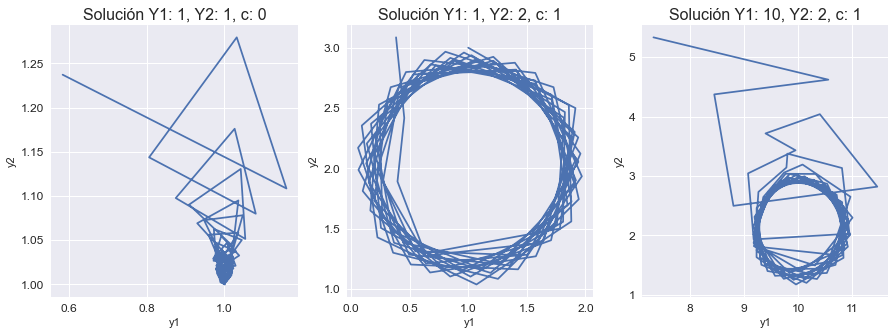

In [63]:
fig, ax = plt.subplots(1, 3, figsize=(3*5, 1*5))
for i in range(3):
    sol_p3 = [sol_p3_1, sol_p3_2, sol_p3_3][i]
    times = np.linspace(0, T, 100)
    X = [sol_p3(t) for t in times] 
    y1 = [x[0] for x in X]
    y2 = [x[1] for x in X]
    label = f"Y1: {experimento[i+1][0]}, Y2: {experimento[i+1][1]}, c: {experimento[i+1][2]}"
    ax[i].plot(y1, y2)
    ax[i].set_title("Solución "+label)
    ax[i].set_xlabel("y1")
    ax[i].set_ylabel("y2")

plt.savefig("e3_1.pdf", bbox_inches='tight', )

Error con Pontryaguin

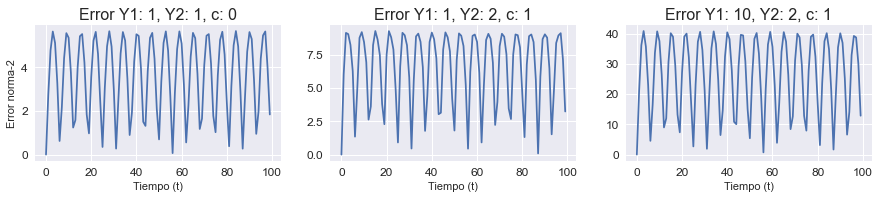

In [83]:
fig, ax = plt.subplots(1, 3, figsize=(3*5, 0.5*5))
for i in range(3):
    sol_p3 = [sol_p3_1, sol_p3_2, sol_p3_3][i]
    sol_p1 = [sol_p1_1, sol_p1_2, sol_p1_3][i]

    times = np.linspace(0, T, 100)

    X = [sol_p3(t) for t in times] 
    p3_y1 = [x[0] for x in X]
    p3_y2 = [x[1] for x in X]

    X = [sol_p1(t) for t in times] 
    p1_y1 = [x[0] for x in X]
    p1_y2 = [x[1] for x in X]

    diff = [np.array([p3_y1[k]-p1_y1[k], p3_y2[k]-p1_y2[k]]) for k in range(len(times))]
    error = [scipy.linalg.norm(d) for d in diff]
    label = f"Y1: {experimento[i+1][0]}, Y2: {experimento[i+1][1]}, c: {experimento[i+1][2]}"
    ax[i].plot(error)
    ax[i].set_title("Error "+label)
    ax[i].set_xlabel("Tiempo (t)")
    if i == 0:
        ax[i].set_ylabel("Error norma-2")
plt.savefig("e3_2.pdf", bbox_inches='tight', )

Error con LQR

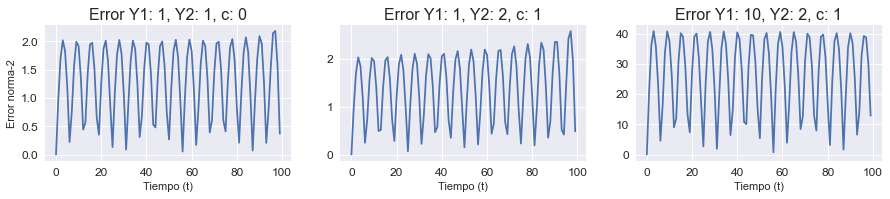

In [127]:
fig, ax = plt.subplots(1, 3, figsize=(3*5, 0.5*5))
for i in range(3):
    sol_p3 = [sol_p3_1, sol_p3_2, sol_p3_3][i]
    sol_p2 = [sol_p2_1, sol_p2_2, sol_p1_3][i]

    times = np.linspace(0, T, 100)

    X = [sol_p3(t) for t in times] 
    p3_y1 = [x[0] for x in X]
    p3_y2 = [x[1] for x in X]

    X = [sol_p2(t) for t in times] 
    p2_y1 = [x[0] for x in X]
    p2_y2 = [x[1] for x in X]

    diff = [np.array([p3_y1[k]-p2_y1[k], p3_y2[k]-p2_y2[k]]) for k in range(len(times))]
    error = [scipy.linalg.norm(d) for d in diff]
    label = f"Y1: {experimento[i+1][0]}, Y2: {experimento[i+1][1]}, c: {experimento[i+1][2]}"
    ax[i].plot(error)
    ax[i].set_title("Error "+label)
    ax[i].set_xlabel("Tiempo (t)")
    if i == 0:
        ax[i].set_ylabel("Error norma-2")
plt.savefig("e3_3.pdf", bbox_inches='tight', )

## Ejercicio 4

In [24]:
# https://github.com/johnny-godoy/bocop-reader
from bocop_solution import BOCOPSolution 
import os
import sys
import numpy as np

In [25]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [26]:
file_sols_m1 = {
    "exp1": "D:/github/MA4703/lab4/bocop/sol_p4/exp1",
    "exp2": "D:/github/MA4703/lab4/bocop/sol_p4/exp2",
    "exp3": "D:/github/MA4703/lab4/bocop/sol_p4/exp3",
}
pc = True
sols_m1 = {
    k: BOCOPSolution(v) if pc else BOCOPSolution(v.replace("D:/github/MA4703/lab4/", ""))
    for k, v in file_sols_m1.items()
}

In [27]:
def plot_p4(sol):    
    controls = sol.controls
    states = sol.states

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.plot(states["y1"].values, states["y2"].values)
    ax.set_title("Solución")
    ax.set_xlabel("y1")
    ax.set_ylabel("y2")

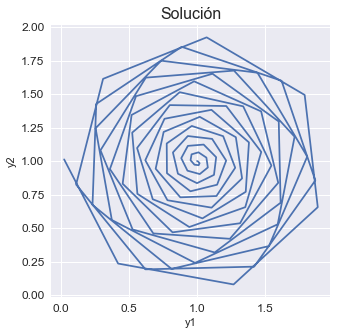

In [84]:
exp = 1
sol_p4_1 = sols_m1[f"exp{exp}"]
plot_p4(sol_p4_1)

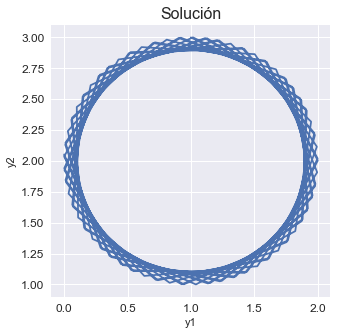

In [85]:
exp = 2
sol_p4_2 = sols_m1[f"exp{exp}"]
plot_p4(sol_p4_2)

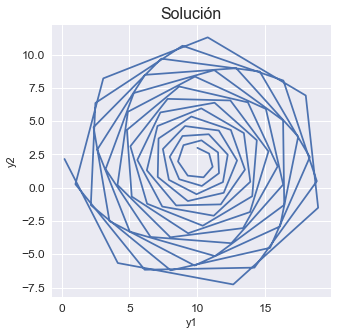

In [86]:
exp = 3
sol_p4_3 = sols_m1[f"exp{exp}"]
plot_p4(sol_p4_3)

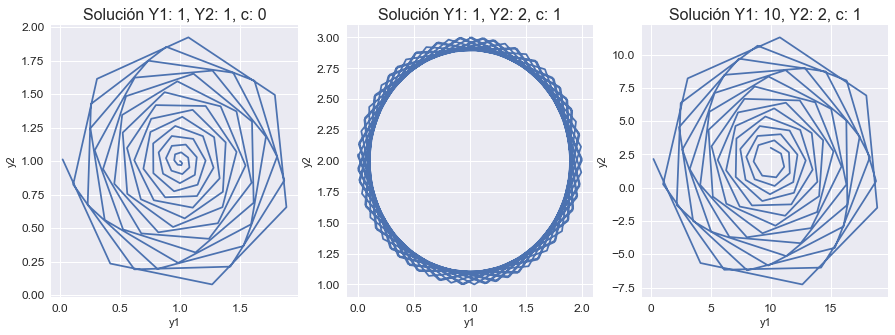

In [90]:
fig, ax = plt.subplots(1, 3, figsize=(3*5, 1*5))
for i in range(3):
    sol_p4 = [sol_p4_1, sol_p4_2, sol_p4_3][i]
    controls = sol_p4.controls
    states = sol_p4.states
    y1, y2 = states["y1"].values, states["y2"].values
    label = f"Y1: {experimento[i+1][0]}, Y2: {experimento[i+1][1]}, c: {experimento[i+1][2]}"
    ax[i].plot(y1, y2)
    ax[i].set_title("Solución "+label)
    ax[i].set_xlabel("y1")
    ax[i].set_ylabel("y2")

plt.savefig("e4_1.pdf", bbox_inches='tight', )

Error con Pontryagin

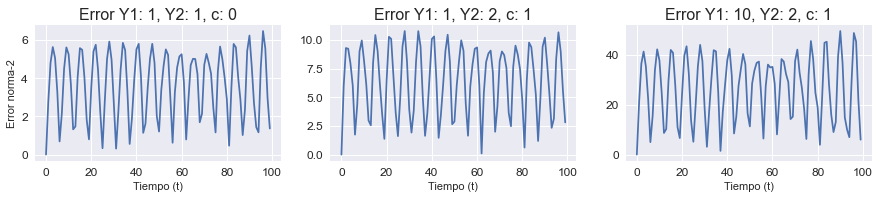

In [93]:
fig, ax = plt.subplots(1, 3, figsize=(3*5, 0.5*5))
for i in range(3):
    sol_p4 = [sol_p4_1, sol_p4_2, sol_p4_3][i]
    sol_p1 = [sol_p1_1, sol_p1_2, sol_p1_3][i]

    controls = sol_p4.controls
    states = sol_p4.states
    p4_y1, p4_y2 = states["y1"].values, states["y2"].values
    
    times = np.linspace(0, T, 100)
    X = [sol_p1(t) for t in times] 
    p1_y1 = [x[0] for x in X]
    p1_y2 = [x[1] for x in X]

    diff = [np.array([p4_y1[k]-p1_y1[k], p4_y2[k]-p1_y2[k]]) for k in range(len(times))]
    error = [scipy.linalg.norm(d) for d in diff]
    label = f"Y1: {experimento[i+1][0]}, Y2: {experimento[i+1][1]}, c: {experimento[i+1][2]}"
    ax[i].plot(error)
    ax[i].set_title("Error "+label)
    ax[i].set_xlabel("Tiempo (t)")
    if i == 0:
        ax[i].set_ylabel("Error norma-2")
plt.savefig("e4_2.pdf", bbox_inches='tight', )

Errores con LQR

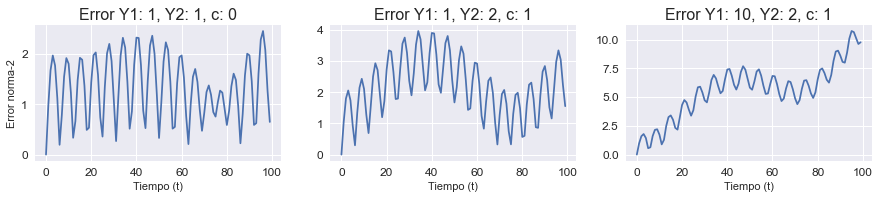

In [128]:
fig, ax = plt.subplots(1, 3, figsize=(3*5, 0.5*5))
for i in range(3):
    sol_p4 = [sol_p4_1, sol_p4_2, sol_p4_3][i]
    sol_p2 = [sol_p2_1, sol_p2_2, sol_p2_3][i]

    controls = sol_p4.controls
    states = sol_p4.states
    p4_y1, p4_y2 = states["y1"].values, states["y2"].values
    
    times = np.linspace(0, T, 100)
    X = [sol_p2(t) for t in times] 
    p2_y1 = [x[0] for x in X]
    p2_y2 = [x[1] for x in X]

    diff = [np.array([p4_y1[k]-p2_y1[k], p4_y2[k]-p2_y2[k]]) for k in range(len(times))]
    error = [scipy.linalg.norm(d) for d in diff]
    label = f"Y1: {experimento[i+1][0]}, Y2: {experimento[i+1][1]}, c: {experimento[i+1][2]}"
    ax[i].plot(error)
    ax[i].set_title("Error "+label)
    ax[i].set_xlabel("Tiempo (t)")
    if i == 0:
        ax[i].set_ylabel("Error norma-2")
plt.savefig("e4_3.pdf", bbox_inches='tight', )

Errores con Ricatti

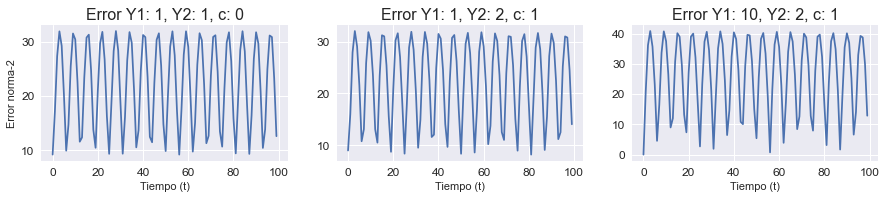

In [129]:
fig, ax = plt.subplots(1, 3, figsize=(3*5, 0.5*5))
for i in range(3):
    sol_p4 = [sol_p4_1, sol_p4_2, sol_p4_3][i]
    sol_p3 = [sol_p3_1, sol_p3_2, sol_p3_3][i]

    controls = sol_p4.controls
    states = sol_p4.states
    p4_y1, p4_y2 = states["y1"].values, states["y2"].values
    
    times = np.linspace(0, T, 100)
    X = [sol_p3(t) for t in times] 
    p3_y1 = [x[0] for x in X]
    p3_y2 = [x[1] for x in X]

    diff = [np.array([p3_y1[k]-p1_y1[k], p3_y2[k]-p1_y2[k]]) for k in range(len(times))]
    error = [scipy.linalg.norm(d) for d in diff]
    label = f"Y1: {experimento[i+1][0]}, Y2: {experimento[i+1][1]}, c: {experimento[i+1][2]}"
    ax[i].plot(error)
    ax[i].set_title("Error "+label)
    ax[i].set_xlabel("Tiempo (t)")
    if i == 0:
        ax[i].set_ylabel("Error norma-2")
plt.savefig("e4_4.pdf", bbox_inches='tight', )

## Ejercicio 5

In [95]:
file_sols_m1 = {
    "exp1": "D:/github/MA4703/lab4/bocop/sol_p5/exp1",
    "exp2": "D:/github/MA4703/lab4/bocop/sol_p5/exp2",
    "exp3": "D:/github/MA4703/lab4/bocop/sol_p5/exp3",
}
pc = True
sols_m1 = {
    k: BOCOPSolution(v) if pc else BOCOPSolution(v.replace("D:/github/MA4703/lab4/", ""))
    for k, v in file_sols_m1.items()
}

In [96]:
def plot_p5(sol):    
    controls = sol.controls
    states = sol.states

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.plot(states["y1"].values, states["y2"].values)
    ax.set_title("Solución")
    ax.set_xlabel("y1")
    ax.set_ylabel("y2")

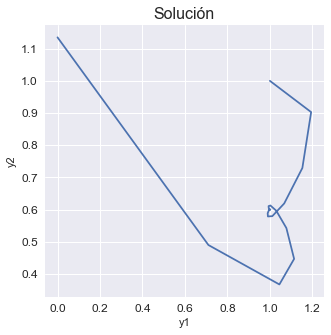

In [97]:
exp = 1
sol_p5_1 = sols_m1[f"exp{exp}"]
plot_p5(sol_p5_1)

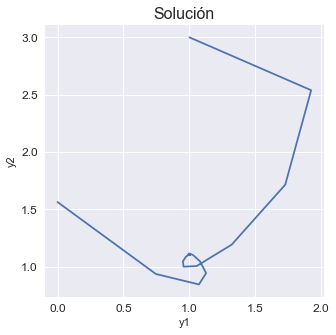

In [98]:
exp = 2
sol_p5_2 = sols_m1[f"exp{exp}"]
plot_p5(sol_p5_2)

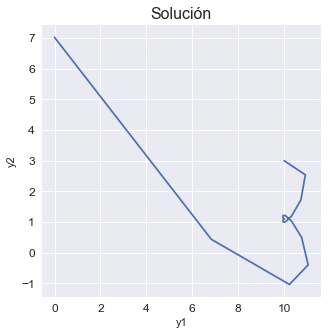

In [99]:
exp = 3
sol_p5_3 = sols_m1[f"exp{exp}"]
plot_p5(sol_p5_3)

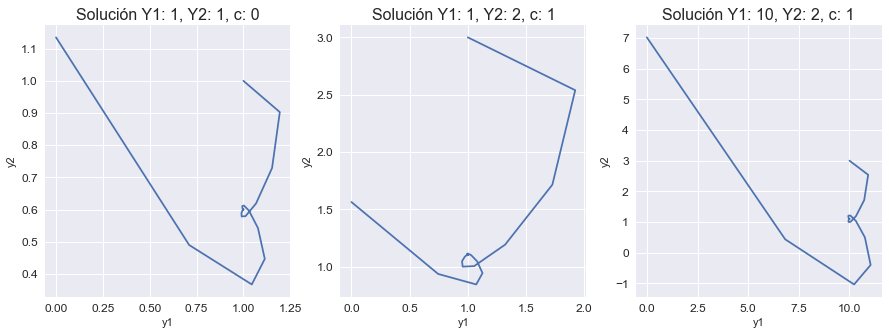

In [100]:
fig, ax = plt.subplots(1, 3, figsize=(3*5, 1*5))
for i in range(3):
    sol_p5 = [sol_p5_1, sol_p5_2, sol_p5_3][i]
    controls = sol_p5.controls
    states = sol_p5.states
    y1, y2 = states["y1"].values, states["y2"].values
    label = f"Y1: {experimento[i+1][0]}, Y2: {experimento[i+1][1]}, c: {experimento[i+1][2]}"
    ax[i].plot(y1, y2)
    ax[i].set_title("Solución "+label)
    ax[i].set_xlabel("y1")
    ax[i].set_ylabel("y2")

plt.savefig("e5_1.pdf", bbox_inches='tight', )